This notebook is for the analysis of the finals measurments.

# Imports

In [20]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Datenauswertung

## Volume

### Load excel

In [21]:
df = pd.read_excel("Data/Zusammenfassung Daten.xlsx", sheet_name="Auswertung Teller", nrows=10)

df

,Objekt,GroundTruth Volumen (cm³),ConvexHull Volumen(cm³),OBB Volumenschätzung(cm³),AlphaShapes Volumen(cm³),Voxelization Volumen(cm³)
0,Apfel,210,229.16,392.80,218.61,213.86
1,Mango,330,559.01,843.86,976.08,510.08
2,Pilz,60,110.82,214.81,113.54,77.44
3,Birne,260,343.27,715.14,344.39,301.53
4,Tomate,125,113.14,169.84,121.49,101.40
5,Gurke,255,273.82,400.98,257.95,243.41
6,Käse,45,44.90,71.74,45.30,46.44
7,Brot,70,37.12,87.05,106.53,30.07
8,Karotte,159,191.66,272.36,186.16,166.33
9,Banane,195,456.95,818.14,448.46,232.00


Arrays

In [3]:
#ObjektNamen Array
name_arr = df["Objekt"]
#GroundTruth Array
true_arr = df["GroundTruth Volumen (cm³)"]
#ConvexHull Array
ch_arr = df["ConvexHull Volumen(cm³)"]
#OBB Array
obb_arr = df["OBB Volumenschätzung(cm³)"]
#AlphaShapes Array
as_arr = df["AlphaShapes Volumen(cm³)"]
#Voxelization Array
v_arr = df["Voxelization Volumen(cm³)"]

### Methoden Auswertung

MAE
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |V_{\text{geschätzt},i} - V_{\text{echt},i}|
$$


In [4]:
ch_mae = mean_absolute_error(true_arr,ch_arr)
obb_mae = mean_absolute_error(true_arr,obb_arr)
as_mae = mean_absolute_error(true_arr,as_arr)
v_mae = mean_absolute_error(true_arr,v_arr)

print(f" Convex Hull MAE: {ch_mae:.2f} \n OBB MAE: {obb_mae:.2f} \n Alpha Shapes MAE: {as_mae:.2f} \n Voxel MAE: {v_mae:.2f}")

 Convex Hull MAE: 74.05 
 OBB MAE: 227.77 
 Alpha Shapes MAE: 111.65 
 Voxel MAE: 36.38


MAPE
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{V_{\text{geschätzt},i} - V_{\text{echt},i}}{V_{\text{echt},i}} \right| \times 100\%
$$

In [5]:
ch_mape = mean_absolute_percentage_error(true_arr,ch_arr)
obb_mape = mean_absolute_percentage_error(true_arr,obb_arr)
as_mape = mean_absolute_percentage_error(true_arr,as_arr)
v_mape = mean_absolute_percentage_error(true_arr,v_arr)

print(f" Convex Hull MAPE: {ch_mape:.2f} \n OBB MAPE: {obb_mape:.2f} \n Alpha Shapes: {as_mape:.2f} \n Voxel MAPE: {v_mape:.2f}")

 Convex Hull MAPE: 0.41 
 OBB MAPE: 1.24 
 Alpha Shapes: 0.53 
 Voxel MAPE: 0.21


RMSE
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_i - Y_i)^2}
$$

In [6]:
ch_rmse = root_mean_squared_error(true_arr,ch_arr)
obb_rmse = root_mean_squared_error(true_arr,obb_arr)
as_rmse = root_mean_squared_error(true_arr,as_arr)
v_rmse = root_mean_squared_error(true_arr,v_arr)

print(f" Convex Hull RMSE: {ch_rmse:.2f} \n OBB RMSE: {obb_rmse:.2f} \n Alpha Shapes RMSE: {as_rmse:.2f} \n Voxel RMSE: {v_rmse:.2f}")

 Convex Hull RMSE: 115.58 
 OBB RMSE: 308.88 
 Alpha Shapes RMSE: 222.22 
 Voxel RMSE: 61.79


#### Methoden Plots

C:\Users\Diren\AppData\Local\Temp\ipykernel_26088\2050806170.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Value", data=data, palette=[colors[m] for m in methods])


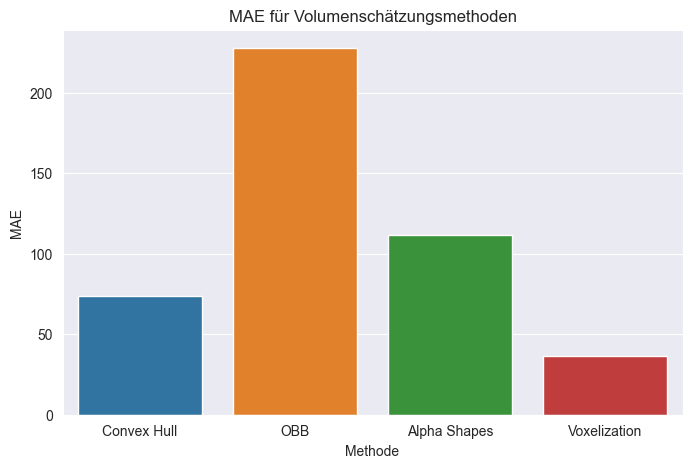

C:\Users\Diren\AppData\Local\Temp\ipykernel_26088\2050806170.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Value", data=data, palette=[colors[m] for m in methods])


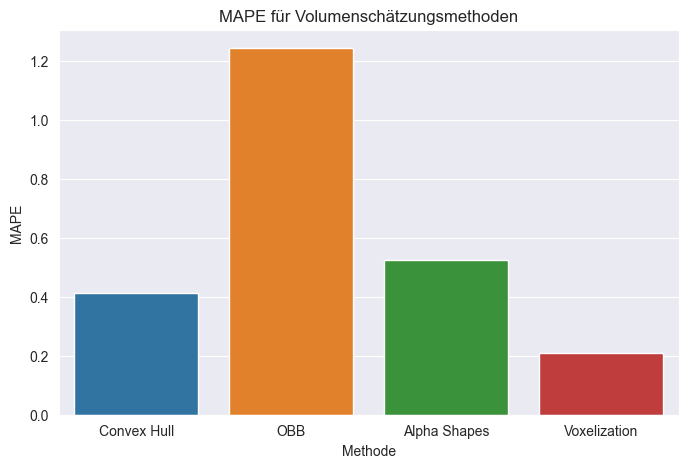

C:\Users\Diren\AppData\Local\Temp\ipykernel_26088\2050806170.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Value", data=data, palette=[colors[m] for m in methods])


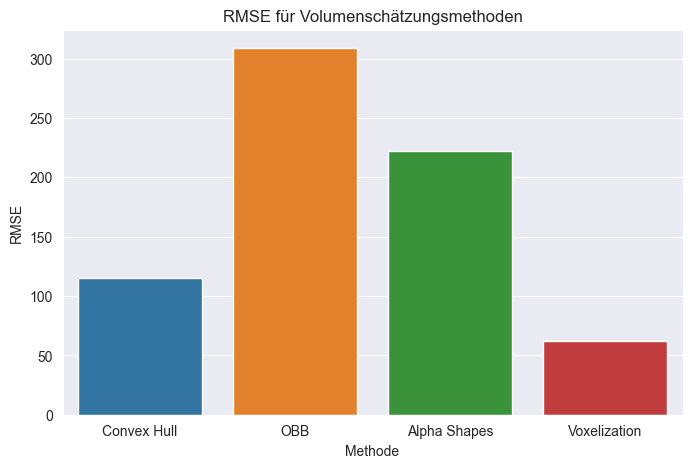

In [7]:

# Definiere Farben, passend zu den Boxplots
colors = {
    "Convex Hull": "#1f77b4",   # Blau
    "OBB": "#ff7f0e",          # Orange
    "Alpha Shapes": "#2ca02c", # Grün
    "Voxelization": "#d62728"  # Rot
}

# Listen für die Visualisierung
methods = ["Convex Hull", "OBB", "Alpha Shapes", "Voxelization"]
mae_values = [ch_mae, obb_mae, as_mae, v_mae]
mape_values = [ch_mape, obb_mape, as_mape, v_mape]
rmse_values = [ch_rmse, obb_rmse, as_rmse, v_rmse]

# DataFrame für Seaborn erstellen
error_types = ["MAE", "MAPE", "RMSE"]
error_values = [mae_values, mape_values, rmse_values]

for error_type, values in zip(error_types, error_values):
    data = pd.DataFrame({
        "Method": methods,
        "Value": values
    })
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x="Method", y="Value", data=data, palette=[colors[m] for m in methods])
    plt.title(f"{error_type} für Volumenschätzungsmethoden")
    plt.ylabel(error_type)
    plt.xlabel("Methode")
    plt.xticks(rotation=0)
    plt.show()

#### Fehlschätzungs Boxplot

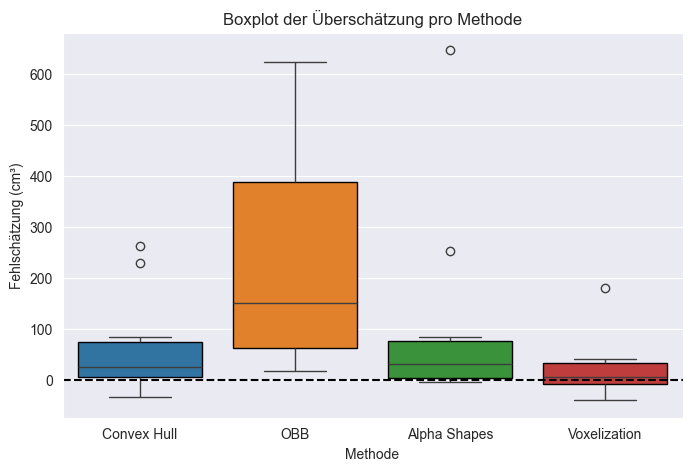

In [8]:
# Berechnung der Fehlschätzung
ch_overestimation = ch_arr - true_arr
obb_overestimation = obb_arr - true_arr
as_overestimation = as_arr - true_arr
v_overestimation = v_arr - true_arr


methods = ["Convex Hull", "OBB", "Alpha Shapes", "Voxelization"]
overestimation_data = [ch_overestimation, obb_overestimation, as_overestimation, v_overestimation]

overestimation_df = pd.DataFrame({
    "Convex Hull": ch_overestimation,
    "OBB": obb_overestimation,
    "Alpha Shapes": as_overestimation,
    "Voxelization": v_overestimation
})

# Boxplots für Überschätzung
plt.figure(figsize=(8, 5))
sns.boxplot(data=overestimation_df, boxprops={"edgecolor": "black"})
plt.xticks(ticks=range(len(methods)), labels=methods)
plt.axhline(0, color='black', linestyle='--')  # Null-Linie zur Orientierung
plt.title("Boxplot der Überschätzung pro Methode")
plt.ylabel("Fehlschätzung (cm³)")
plt.xlabel("Methode")
plt.show()



#### Tendenzen nach Objekt

In [9]:
# Berechnung der RELATIVEN Abweichungen in Prozent
convex_hull_rel = np.abs(ch_arr - true_arr) / true_arr * 100
obb_rel = np.abs(obb_arr - true_arr) / true_arr * 100
alpha_shapes_rel = np.abs(as_arr - true_arr) / true_arr * 100
voxelization_rel = np.abs(v_arr - true_arr) / true_arr * 100


In [58]:
# Erstellen des DataFrames
df = pd.DataFrame({
    "Ground Truth": true_arr,
    "Lebensmittel": name_arr,
    "Convex Hull": convex_hull_rel,
    "OBB": obb_rel,
    "Alpha Shapes": alpha_shapes_rel,
    "Voxelization": voxelization_rel
})

# Umwandlung für den Plot
df_melted = df.melt(id_vars=["Ground Truth", "Lebensmittel"],
                    var_name="Methode",
                    value_name="Relative Abweichung (%)")

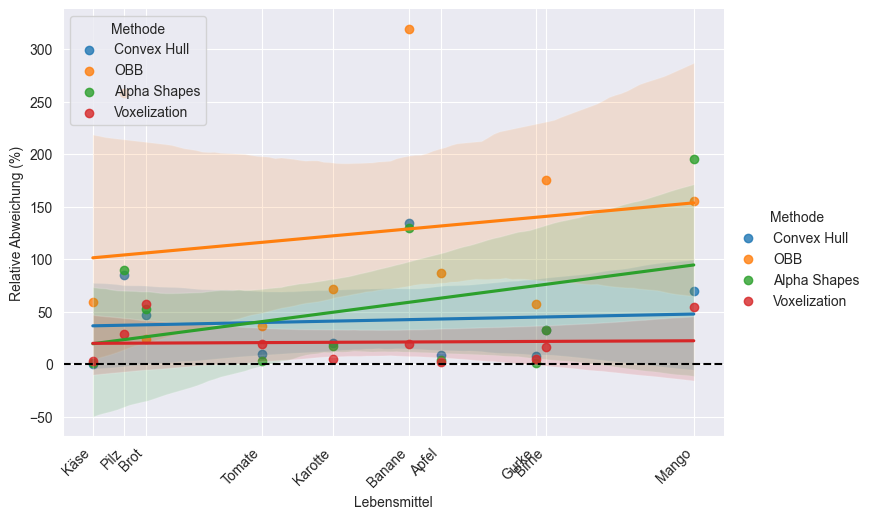

In [59]:
# Regressionslinien für jede Methode hinzufügen (Korrekte Darstellung!)
sns.lmplot(data=df_melted, x="Ground Truth", y="Relative Abweichung (%)", hue="Methode", ci=95, aspect=1.5)

# Lebensmittel als X-Achsen-Beschriftung hinzufügen
plt.xticks(ticks=df["Ground Truth"], labels=df["Lebensmittel"], rotation=45, ha="right")

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Lebensmittel")
plt.ylabel("Relative Abweichung (%)")
plt.legend(title="Methode")

plt.show()

In [70]:
relative_abweichung = np.abs(140 - 130) / 130 * 100
relative_abweichung

np.float64(7.6923076923076925)

Absolute relative Abweichungen

In [68]:
# Erstellen des DataFrames mit den relativen Abweichungen
df_relative = pd.DataFrame({
    "Lebensmittel": name_arr,
    "Convex Hull (%)": np.round(convex_hull_rel, 2),
    "OBB (%)": np.round(obb_rel, 2),
    "Alpha Shapes (%)": np.round(alpha_shapes_rel, 2),
    "Voxelization (%)": np.round(voxelization_rel, 2)
})

# Berechnung der durchschnittlichen relativen Abweichung für jedes Lebensmittel über alle Methoden
df_relative["Durchschnittliche relative Abweichung (%)"] = np.round(df_relative.iloc[:, 1:].mean(axis=1), 2)

# Berechnung der durchschnittlichen relativen Abweichung für jede Methode über alle Lebensmittel
mean_per_method = np.round(df_relative.iloc[:, 1:].mean(axis=0), 2).to_frame().T

mean_per_method.insert(0, "Lebensmittel", "Durchschnittliche relative Abweichung über alle Lebensmittel (%)")

df_relative = pd.concat([df_relative, mean_per_method], ignore_index=True)


In [69]:
df_relative

,Lebensmittel,Convex Hull (%),OBB (%),Alpha Shapes (%),Voxelization (%),Durchschnittliche relative Abweichung (%)
0,Apfel,9.12,87.05,4.10,1.84,25.53
1,Mango,69.40,155.72,195.78,54.57,118.87
2,Pilz,84.70,258.02,89.23,29.07,115.26
3,Birne,32.03,175.05,32.46,15.97,63.88
4,Tomate,9.49,35.87,2.81,18.88,16.76
5,Gurke,7.38,57.25,1.16,4.55,17.58
6,Käse,0.22,59.42,0.67,3.20,15.88
7,Brot,46.97,24.36,52.19,57.04,45.14
8,Karotte,20.54,71.30,17.08,4.61,28.38
9,Banane,134.33,319.56,129.98,18.97,150.71


Relative absolute Abweichungen Vergleich zu konstantakopoulos_3d_2021

In [73]:
# konstantakopoulos_3d_2021 Daten
actual_volume = np.array([130, 80, 135, 120, 165, 85])  # Tatsächliches Volumen
estimated_volume = np.array([140, 83, 149, 125, 149, 86])  # Geschätztes Volumen

# Berechnung der absoluten relativen Abweichung in Prozent
absolute_relative_deviation = np.abs(((estimated_volume - actual_volume) / actual_volume) * 100)
absolute_relative_deviation = np.round(absolute_relative_deviation,2)

# Ergebnisse als DataFrame zur besseren Darstellung
df_absolute_deviation = pd.DataFrame({
    "Object": ["Banane", "Pilz", "Birne", "Karotte", "Apfel", "Tomate"],
    "Meins" : [18.97, 29.07, 15.97, 4.61, 1.84, 18.88],
    "konst (%)": absolute_relative_deviation
})

df_absolute_deviation

,Object,Meins,konst (%)
0,Banane,18.97,7.69
1,Pilz,29.07,3.75
2,Birne,15.97,10.37
3,Karotte,4.61,4.17
4,Apfel,1.84,9.70
5,Tomate,18.88,1.18


#### Heatmap

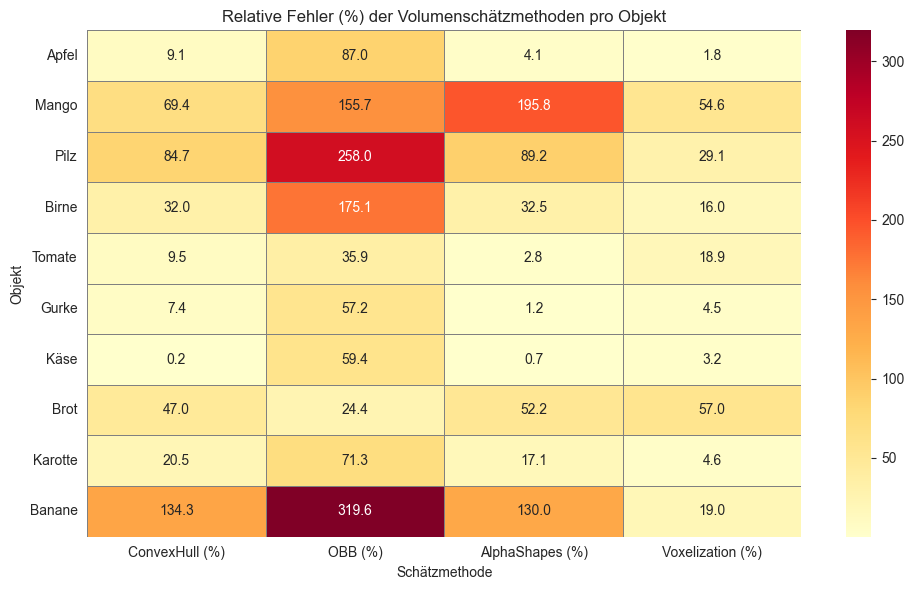

In [13]:

# DataFrame aus deinen bestehenden Fehler-Arrays
rel_error_df = pd.DataFrame({
    "Objekt": name_arr,
    "ConvexHull (%)": convex_hull_rel,
    "OBB (%)": obb_rel,
    "AlphaShapes (%)": alpha_shapes_rel,
    "Voxelization (%)": voxelization_rel
})

# Setze Objektname als Index für die Heatmap
rel_error_df.set_index("Objekt", inplace=True)

# Zeichne die Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rel_error_df, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=0.5, linecolor='gray')
plt.title("Relative Fehler (%) der Volumenschätzmethoden pro Objekt")
plt.ylabel("Objekt")
plt.xlabel("Schätzmethode")
plt.tight_layout()
plt.show()

#### Korrelation zwischen dem relativen Fehler und der Volumengröße

📊 Korrelationen mit GroundTruth:
Convex Hull     0.087633
OBB             0.176078
Alpha Shapes    0.380801
Voxelization    0.040431
Name: GroundTruth, dtype: float64


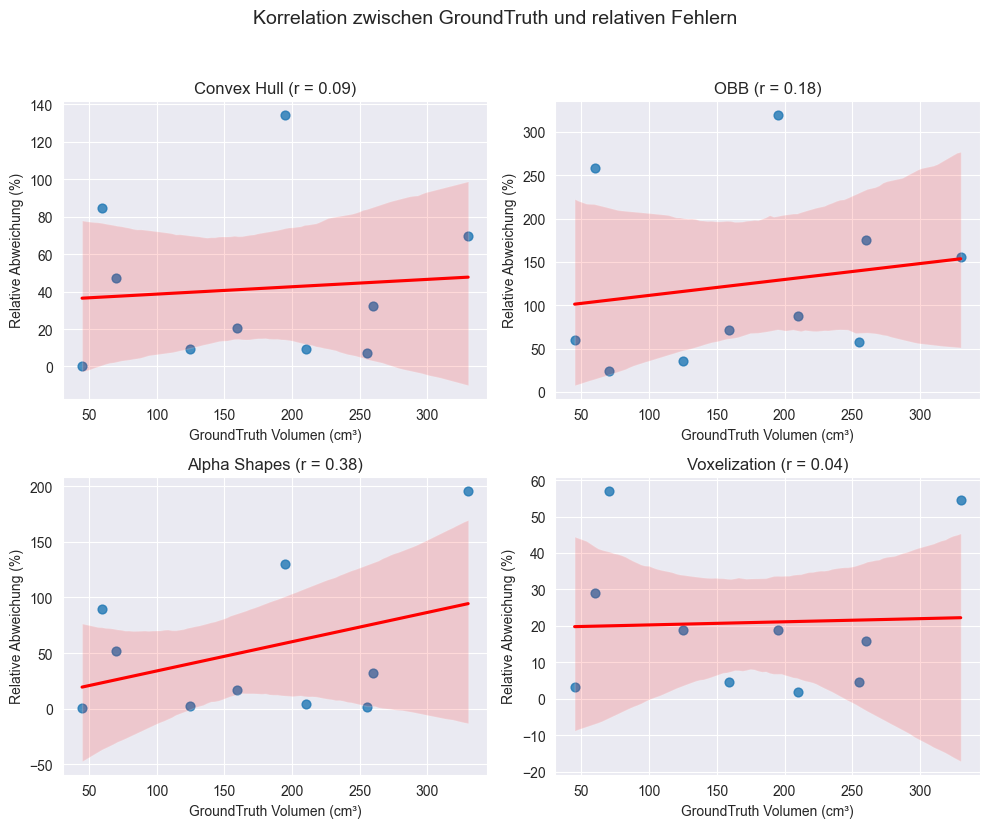

In [22]:

# DataFrame mit GroundTruth und relativen Fehlern
corr_df = pd.DataFrame({
    "GroundTruth": true_arr,
    "Convex Hull": convex_hull_rel,
    "OBB": obb_rel,
    "Alpha Shapes": alpha_shapes_rel,
    "Voxelization": voxelization_rel
})

# Korrelationskoeffizienten berechnen
correlation_with_truth = corr_df.corr(numeric_only=True)["GroundTruth"].drop("GroundTruth")
print("Korrelationen mit GroundTruth:")
print(correlation_with_truth)

# Methodenliste
methods = ["Convex Hull", "OBB", "Alpha Shapes", "Voxelization"]

# 2x2 Subplots erstellen
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Scatterplots mit Regressionslinien
for i, method in enumerate(methods):
    sns.regplot(
        ax=axes[i],
        x=corr_df["GroundTruth"],
        y=corr_df[method],
        scatter_kws={"s": 40},
        line_kws={"color": "red"}
    )
    r = corr_df["GroundTruth"].corr(corr_df[method])
    axes[i].set_title(f"{method} (r = {r:.2f})")
    axes[i].set_xlabel("GroundTruth Volumen (cm³)")
    axes[i].set_ylabel("Relative Abweichung (%)")

# Gesamttitel
plt.suptitle("Korrelation zwischen GroundTruth und relativen Fehlern", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()


## Maße

### Load excel

In [7]:
df_maeasurments = pd.read_excel("Data/Zusammenfassung Daten.xlsx", sheet_name="Daten", nrows=10)

df_maeasurments

,Objekt,X in cm,Y in cm,Z in cm,X estimated,Y estimated,Z estimated
0,Apfel,6.87,6.77,8.09,7.6,7.00,7.75
1,Mango,11.30,9.27,7.69,10.9,9.70,8.50
2,Pilz,5.46,6.90,5.16,5.3,6.90,6.10
3,Birne,13.14,7.01,6.92,13.8,7.70,7.40
4,Tomate,6.22,6.39,5.46,6.2,6.28,5.40
5,Karotte,18.90,3.70,3.75,19.4,3.45,3.20
6,Gurke,16.35,8.70,4.25,16.9,9.00,4.90
7,Käse,4.80,4.93,2.45,5.0,5.20,2.60
8,Brot,10.50,9.50,1.00,10.5,11.10,0.90
9,Banane,16.80,3.80,4.00,17.6,3.60,3.90


In [8]:
# DataFrame erstellen
df = pd.DataFrame(df_maeasurments)

# Fehlerberechnung
df["X-Fehler"] = abs(df["X in cm"] - df["X estimated"])
df["Y-Fehler"] = abs(df["Y in cm"] - df["Y estimated"])
df["Z-Fehler"] = abs(df["Z in cm"] - df["Z estimated"])

# Euklidischer Fehler (3D-Abstand)
df["Gesamtfehler (eukl.)"] = np.sqrt(
    (df["X in cm"] - df["X estimated"])**2 +
    (df["Y in cm"] - df["Y estimated"])**2 +
    (df["Z in cm"] - df["Z estimated"])**2
)

# Tabelle mit Fehlern
df_errors = df[["Objekt", "X-Fehler", "Y-Fehler", "Z-Fehler", "Gesamtfehler (eukl.)"]]
df_errors

,Objekt,X-Fehler,Y-Fehler,Z-Fehler,Gesamtfehler (eukl.)
0,Apfel,0.73,0.23,0.34,0.837496
1,Mango,0.40,0.43,0.81,1.000500
2,Pilz,0.16,0.00,0.94,0.953520
3,Birne,0.66,0.69,0.48,1.068691
4,Tomate,0.02,0.11,0.06,0.126886
5,Karotte,0.50,0.25,0.55,0.784219
6,Gurke,0.55,0.30,0.65,0.902774
7,Käse,0.20,0.27,0.15,0.367967
8,Brot,0.00,1.60,0.10,1.603122
9,Banane,0.80,0.20,0.10,0.830662


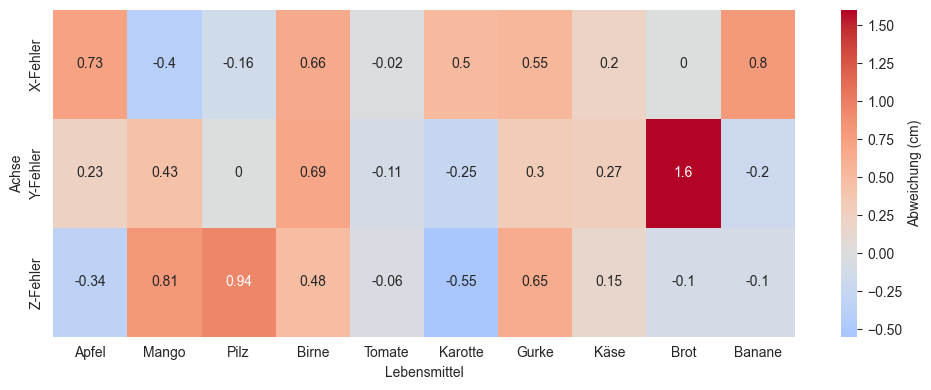

In [16]:
# Differenzen (Schätzfehler, auch negativ möglich)
df["X-Fehler"] = df["X estimated"] - df["X in cm"]
df["Y-Fehler"] = df["Y estimated"] - df["Y in cm"]
df["Z-Fehler"] = df["Z estimated"] - df["Z in cm"]

# DataFrame mit Rohfehlern für Heatmap
df_raw_errors = df[["Objekt", "X-Fehler", "Y-Fehler", "Z-Fehler"]].set_index("Objekt").T

# Heatmap zeichnen
plt.figure(figsize=(10, 4))
sns.heatmap(df_raw_errors, annot=True, center=0, cmap="coolwarm", cbar_kws={'label': 'Abweichung (cm)'})
plt.title("Rohfehlerkarte (geschätzt - gemessen) für X, Y und Z")
plt.ylabel("Achse")
plt.xlabel("Lebensmittel")
plt.tight_layout()
plt.show()

In [17]:
# MAPE für jede Achse berechnen
mape_x = (df["X-Fehler"] / df["X in cm"]).mean() * 100
mape_y = (df["Y-Fehler"] / df["Y in cm"]).mean() * 100
mape_z = (df["Z-Fehler"] / df["Z in cm"]).mean() * 100

# Ergebnisse als DataFrame zusammenfassen
df_mape = pd.DataFrame({
    "Achse": ["X", "Y", "Z"],
    "MAPE (%)": [mape_x, mape_y, mape_z]
})

In [18]:
df_mape

,Achse,MAPE (%)
0,X,2.379496
1,Y,2.990474
2,Z,2.463491
